# **Import Library**

##### Pada tahap ini, kita mengimpor berbagai pustaka Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Library seperti pandas dan numpy digunakan untuk manipulasi data, sedangkan matplotlib, seaborn, dan yellowbrick membantu visualisasi dan evaluasi model. Untuk pra-pemrosesan data, digunakan OneHotEncoder, StandardScaler, MinMaxScaler, dan LabelEncoder. Selain itu, VarianceThreshold dan PCA dimanfaatkan untuk seleksi serta reduksi fitur, sementara train_test_split digunakan untuk membagi data latih dan uji. Terakhir, KMeans, DBSCAN, dan silhouette_score digunakan untuk analisis clustering yang dapat memberikan insight tambahan terhadap struktur data.

In [73]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow

from sklearn.cluster import KMeans  # Mengimpor algoritma KMeans untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.preprocessing import LabelEncoder

import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# **Memuat Dataset**

##### Pada tahap ini, kita memuat dataset pelanggan dari sumber publik ke dalam notebook menggunakan pustaka pandas. Dataset ini berisi berbagai informasi terkait pelanggan seperti umur, pendapatan tahunan, skor pengeluaran, profesi, pengalaman kerja, dan ukuran keluarga. Data ini akan digunakan untuk proses analisis dan pemodelan lebih lanjut. Dataset tersedia dalam format .csv dan diambil langsung dari repositori GitHub. Setelah data berhasil dimuat, kita menampilkan beberapa baris pertama menggunakan df.head() untuk memastikan data telah terbaca dengan benar dan memahami struktur awal dataset.

In [74]:
# Datanya Saya Upload ke Github pribadi (Public).
# Jika ingin mengecek sumber kagglenya : https://www.kaggle.com/datasets/datascientistanna/customers-dataset/data
df=pd.read_csv("https://raw.githubusercontent.com/TokSeKa-uajy/datasetPython/refs/heads/main/MCAkhir/Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# **Exploratory Data Analysis (EDA)**


### Memahami Struktur Data
- Data terdiri dari 2000 baris dan 8 kolom
- Sepertinya terdapat missing values pada kolom Profession
- 1 tipe ID Numerik (sebaiknya drop untuk clustering nanti)
- 2 tipe kategori (umur dan profesi)
- 5 sisanya tipe numerik

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


#### Hasil deskripsi data numerik:
- Ada umur 0 (sepertinya terdapat kesalahan input)
- Annual Income dan Spending Score terlihat memiliki rentang yang luas.

In [76]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


### Menangani Data yang Hilang
#### Karena data yang hilang bertipe kategorikal dan jumlahnya tidak signifikan, maka akan dihapus pada tahap selanjutnya.

In [77]:
#Cek data kosong (profesi ada 35 data kosong)
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


In [78]:
#Cek data duplikat (gak ada data duplikat)
df.duplicated().sum()

np.int64(0)

### Analisis Distribusi dan Korelasi

#### Gender cukup seimbang walau lebih dominan wanita (59.3%)

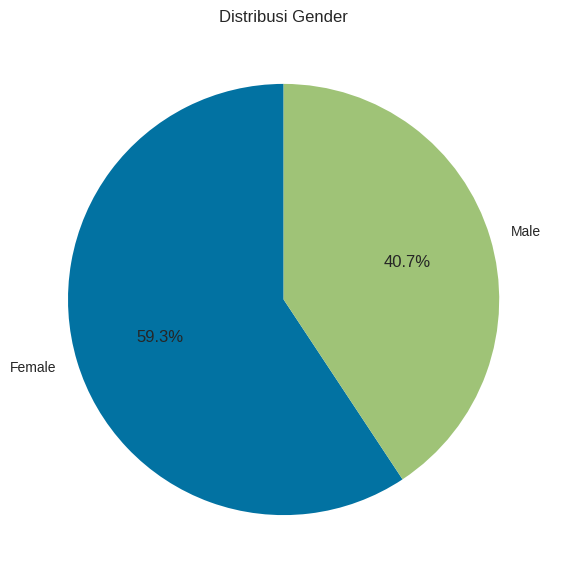

In [79]:
# Menghitung distribusi gender dan menampilkan pie chart untuk visualisasi
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Gender')
plt.show()


#### Ditemukan keanehan pada distribusi usia, di mana terdapat banyak individu berusia di bawah 18 tahun yang tercatat memiliki pekerjaan profesional. Selain itu, terdapat juga individu dengan usia di atas 90 tahun yang masih bekerja. Meskipun usia lanjut masih dapat dimaklumi, keberadaan pekerja profesional di rentang usia 1–18 tahun tampak tidak wajar dan menimbulkan keraguan terhadap validitas data tersebut.

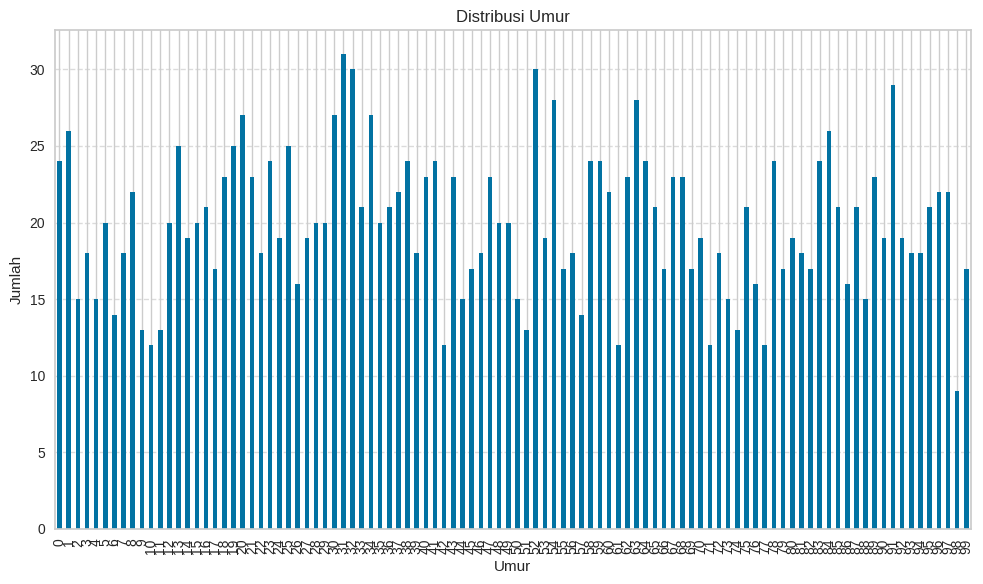

In [80]:
# Menghitung distribusi umur dan menampilkan bar chart untuk visualisasi
age_counts = df['Age'].value_counts().sort_index()  # Hitung frekuensi usia dan urutkan dari yang terkecil
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')  # Bar vertikal agar bisa terlihat urutan usia
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Catatan setelah melihat kolom umur:
- Distribusi data usia menunjukkan ketidakwajaran, seperti banyaknya individu berusia di bawah 18 tahun yang bekerja, individu berusia di atas 90 tahun yang masih aktif bekerja, serta pola distribusi yang terlalu merata, padahal secara umum usia cenderung mengikuti distribusi normal.
- Proporsi data usia yang valid relatif kecil, sehingga jika dilakukan penyaringan atau penghapusan data anomali, akan menghilangkan sekitar seperempat dari total data.
- Bahkan jika tidak dikaitkan dengan kolom pekerjaan, keberadaan individu berusia 0–7 tahun yang tercatat melakukan aktivitas konsumsi juga tampak tidak masuk akal.
- Oleh karena itu, disarankan untuk tidak menggunakan kolom usia dalam proses analisis, terutama pada tahapan clustering, karena kontribusinya terhadap model diperkirakan rendah dan justru dapat mengganggu hasil.

In [81]:
# Menghitung jumlah data dengan umur di bawah 18 tahun
jumlah_di_bawah_18 = df[df['Age'] < 18].shape[0]
print(f"Jumlah individu dengan umur di bawah 18 tahun: {jumlah_di_bawah_18}")


Jumlah individu dengan umur di bawah 18 tahun: 332


In [82]:
# Menghitung persentasi umur di bawah 18 tahun
persentase_di_bawah_18 = (jumlah_di_bawah_18 / df.shape[0]) * 100
print(f"Persentase individu umur di bawah 18 tahun: {persentase_di_bawah_18:.2f}%")


Persentase individu umur di bawah 18 tahun: 16.60%


In [83]:
# Menghitung jumlah data dengan umur di atas 90 tahun
jumlah_di_atas_90 = df[df['Age'] > 90].shape[0]
print(f"Jumlah individu dengan umur di atas 90 tahun: {jumlah_di_atas_90}")

Jumlah individu dengan umur di atas 90 tahun: 175


In [84]:
# Menghitung persentase individu dengan umur di atas 90 tahun
persentase_di_atas_90 = (jumlah_di_atas_90 / df.shape[0]) * 100
print(f"Persentase individu umur di atas 90 tahun: {persentase_di_atas_90:.2f}%")

Persentase individu umur di atas 90 tahun: 8.75%


#### Dari hasil eksplorasi data, ditemukan bahwa profesi dengan jumlah terbanyak adalah Artist dan Healthcare, sementara Homemaker merupakan profesi dengan jumlah paling sedikit dalam dataset.

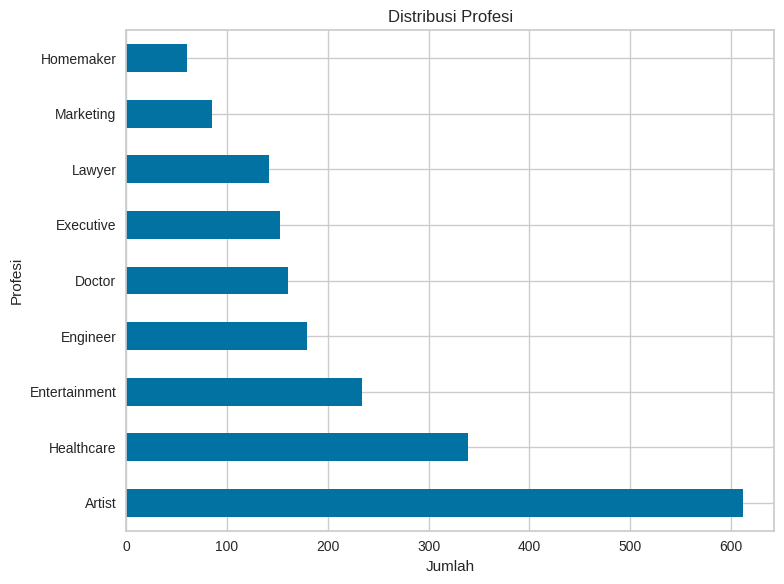

In [85]:
# Menghitung distribusi profesi dan menampilkan bar chart horizontal
counts_profession = df['Profession'].value_counts()
plt.figure(figsize=(8, 6))
counts_profession.plot(kind='barh')
plt.title('Distribusi Profesi')
plt.xlabel('Jumlah')
plt.ylabel('Profesi')
plt.tight_layout()
plt.show()

####Analisis Kolom Pengalaman Kerja
##### Distribusi data menunjukkan bahwa mayoritas individu tercatat memiliki pengalaman kerja selama 1 tahun atau tidak memiliki pengalaman sama sekali. Hal ini cukup janggal jika dibandingkan dengan kolom profesi, karena hampir seluruh entri memiliki profesi yang tercantum. Oleh karena itu, kolom ini dapat dipertimbangkan untuk tidak digunakan apabila validitasnya diragukan.

Alternatif penjelasan yang mungkin adalah bahwa individu dengan profesi Artist dan Homemaker tidak menganggap diri mereka memiliki pengalaman kerja formal, mengingat jumlahnya relatif sebanding.

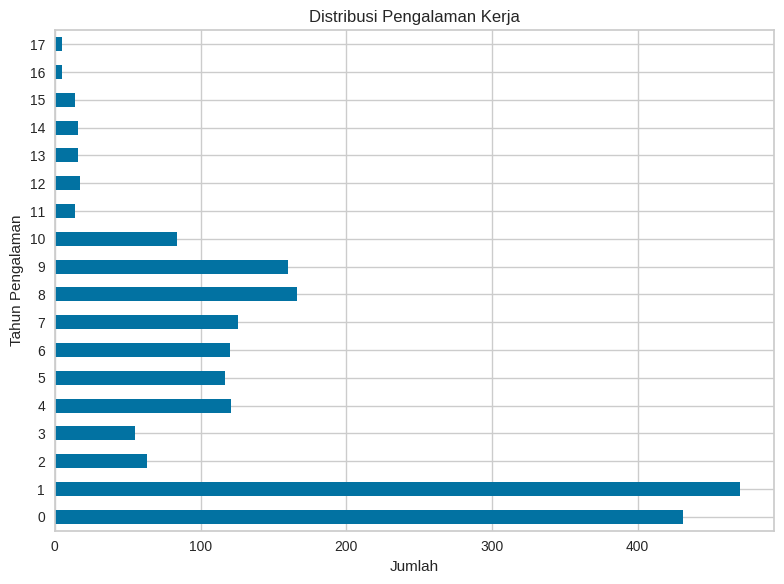

In [86]:
# Menghitung distribusi pengalaman kerja dan menampilkan bar chart horizontal
counts_experience = df['Work Experience'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
counts_experience.plot(kind='barh')
plt.title('Distribusi Pengalaman Kerja')
plt.xlabel('Jumlah')
plt.ylabel('Tahun Pengalaman')
plt.tight_layout()
plt.show()

##### Temuan Utama Berdasarkan Dua Sel Berikut:
- Distribusi profesi pada individu dengan Work Experience bernilai 0 dan 1 sangat mirip dengan distribusi profesi secara keseluruhan.
- Profesi seperti Artist, Healthcare, dan Entertainment tetap mendominasi, meskipun individu tersebut tercatat tidak memiliki pengalaman kerja.
- Hal ini mengindikasikan bahwa kolom Profession kemungkinan besar tidak merepresentasikan status pekerjaan yang sesungguhnya, atau terdapat inkonsistensi dalam proses penyusunan data.
- Besar kemungkinan data ini bersifat fiktif atau sintetik, atau merupakan hasil pelabelan yang dilakukan secara tidak sistematis misalnya, entri profesi diisi terlebih dahulu, sementara pengalaman kerja diisi belakangan tanpa memperhatikan keterkaitan logis antar atribut.

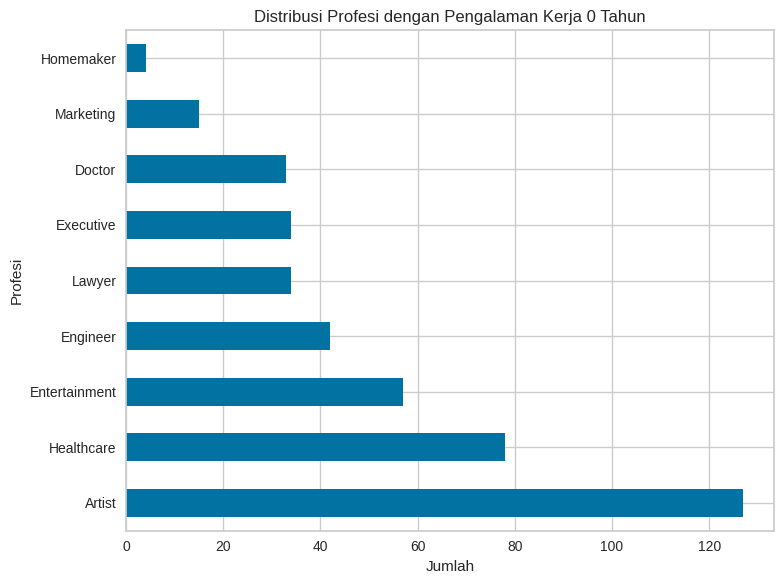

In [87]:
# Filter data dengan pengalaman kerja = 0
df_zero_exp = df[df['Work Experience'] == 0]

# Hitung distribusi profesi di antara mereka
counts_prof_zero_exp = df_zero_exp['Profession'].value_counts()

# Visualisasikan
plt.figure(figsize=(8, 6))
counts_prof_zero_exp.plot(kind='barh')
plt.title('Distribusi Profesi dengan Pengalaman Kerja 0 Tahun')
plt.xlabel('Jumlah')
plt.ylabel('Profesi')
plt.tight_layout()
plt.show()


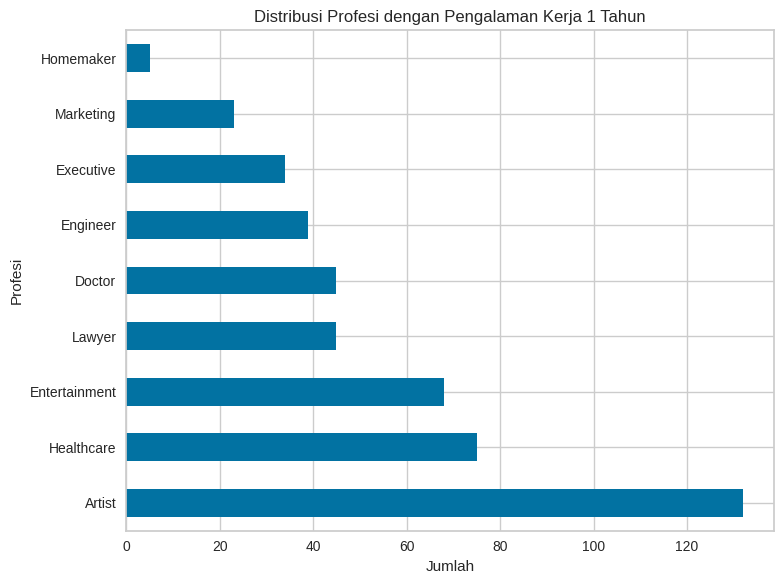

In [88]:
# Filter data dengan pengalaman kerja = 1
df_zero_exp = df[df['Work Experience'] == 1]

# Hitung distribusi profesi di antara mereka
counts_prof_zero_exp = df_zero_exp['Profession'].value_counts()

# Visualisasikan
plt.figure(figsize=(8, 6))
counts_prof_zero_exp.plot(kind='barh')
plt.title('Distribusi Profesi dengan Pengalaman Kerja 1 Tahun')
plt.xlabel('Jumlah')
plt.ylabel('Profesi')
plt.tight_layout()
plt.show()


#### Data menunjukkan bahwa ukuran keluarga didominasi oleh nilai antara 1 (individu tunggal) hingga 7 (kemungkinan keluarga besar), dengan jumlah data yang sangat sedikit pada kategori 8 dan 9.

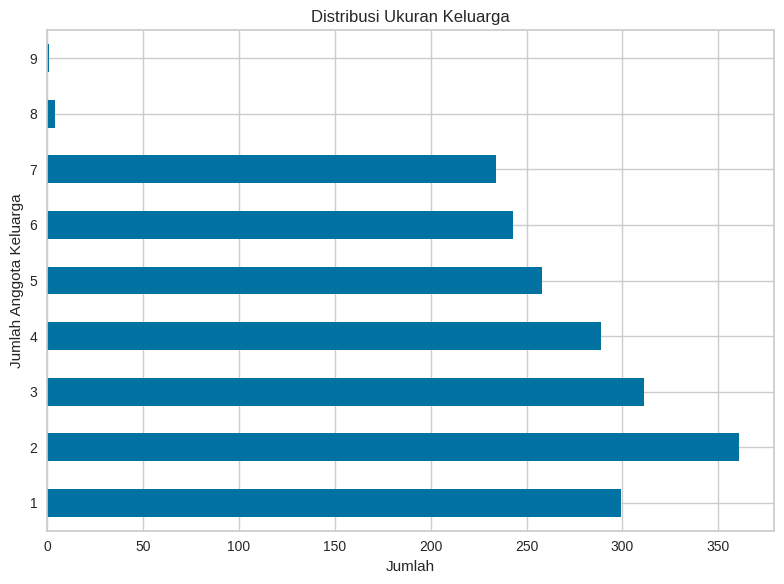

In [89]:
# Menghitung distribusi ukuran keluarga dan menampilkan bar chart horizontal
counts_family = df['Family Size'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
counts_family.plot(kind='barh')
plt.title('Distribusi Ukuran Keluarga')
plt.xlabel('Jumlah')
plt.ylabel('Jumlah Anggota Keluarga')
plt.tight_layout()
plt.show()

#### Analisis Kolom Annual Income
- Nilai Annual Income tampak tersebar secara acak dan merata di sepanjang indeks.
- Histogram menunjukkan distribusi yang relatif merata, dengan konsentrasi sedikit lebih tinggi pada kisaran $75.000–$125.000.
- Distribusi tidak mengikuti pola normal.
- Meskipun demikian, tidak terdapat outlier ekstrem, sehingga nilai-nilai pada kolom ini masih layak digunakan dalam proses clustering.
- Secara umum, kolom Annual Income tetap relevan karena mencerminkan daya beli dan dapat memberikan kontribusi bermakna dalam analisis segmentasi.

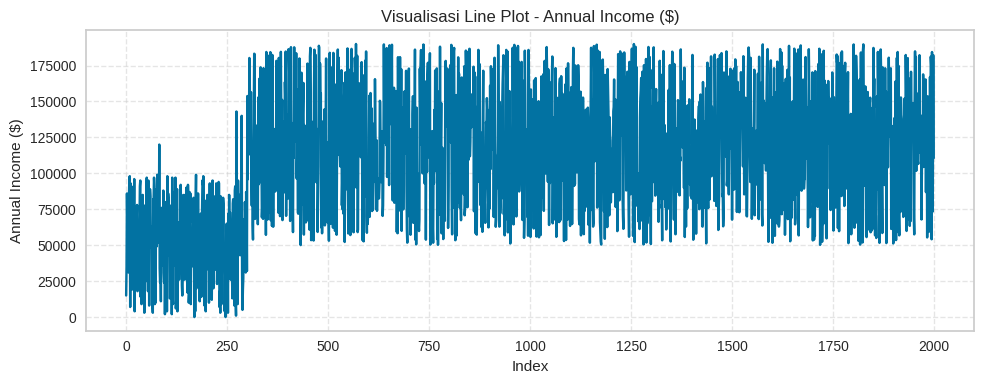

In [90]:
plt.figure(figsize=(10, 4))
plt.plot(df['Annual Income ($)'])
plt.title('Visualisasi Line Plot - Annual Income ($)')
plt.xlabel('Index')
plt.ylabel('Annual Income ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

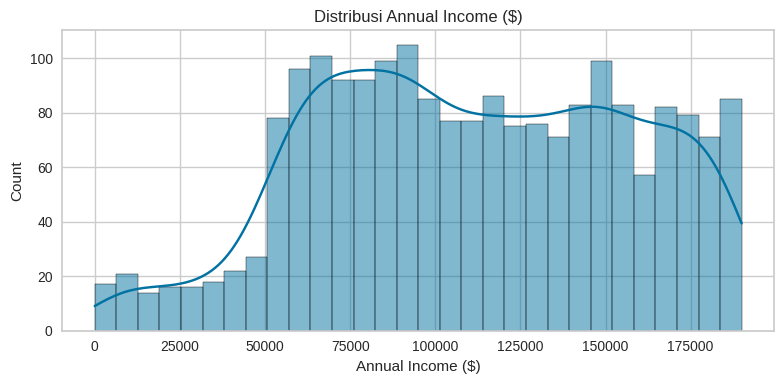

In [91]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Annual Income ($)'], kde=True, bins=30)
plt.title('Distribusi Annual Income ($)')
plt.xlabel('Annual Income ($)')
plt.tight_layout()
plt.show()


####Analisis Kolom Spending Score (1–100)
- Nilai Spending Score menunjukkan fluktuasi yang cukup tinggi dan tersebar secara acak di sepanjang indeks.
- Distribusinya cenderung simetris dan mendekati pola normal, meskipun terdapat variasi yang signifikan antar nilai.
- Skor pada kisaran 40–60 merupakan yang paling dominan, yang mengindikasikan bahwa mayoritas pelanggan memiliki tingkat aktivitas belanja pada kategori sedang.


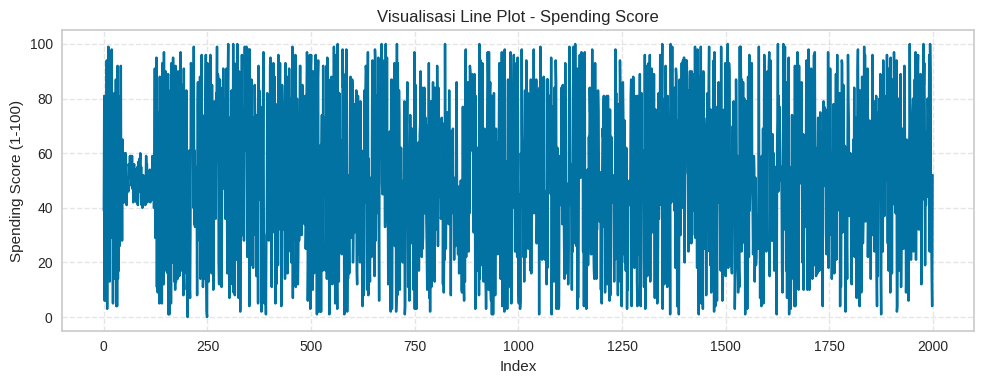

In [92]:
plt.figure(figsize=(10, 4))
plt.plot(df['Spending Score (1-100)'])
plt.title('Visualisasi Line Plot - Spending Score')
plt.xlabel('Index')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


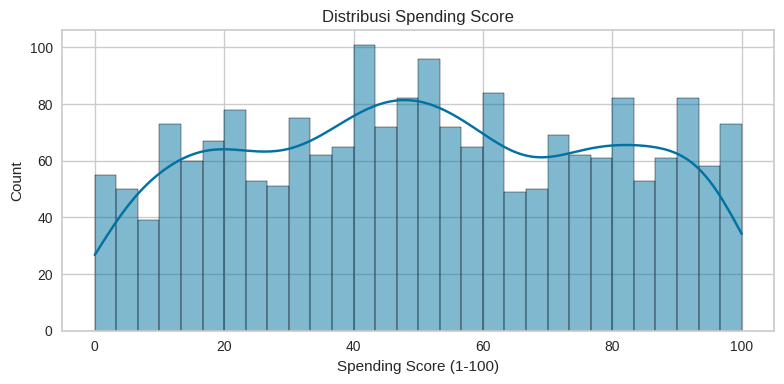

In [93]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=30)
plt.title('Distribusi Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.tight_layout()
plt.show()


### Kesimpuan setelah melakukan EDA:
#### Fitur yang Dipilih untuk Analisis Lanjutan:
- Annual Income ($): Merepresentasikan daya beli konsumen.
- Spending Score (1–100): Menggambarkan intensitas atau frekuensi aktivitas belanja.
- Family Size: Memberikan konteks terhadap kebutuhan rumah tangga.
- Work Experience: Mewakili tingkat pengalaman kerja individu.
- Gender: Memberikan perspektif terhadap potensi perbedaan perilaku belanja antar gender.

#### Catatan Tambahan:
##### Fitur seperti Age dan Profession dipertimbangkan untuk tidak digunakan karena ditemukan ketidakkonsistenan dan potensi ketidakakuratan data. Kolom Work Experience juga akan tetap dipantau dan kemungkinan akan difilter lebih lanjut pada tahap berikutnya.

# **Data Preprocessing**

#### Penjelasan:
- Membersihkan kolom profesi dari data kosong
- Tidak ada duplikasi data
- Akan encoding pakai one hot untuk gender
- Karena data sintetis dan pas visualisasi kayaknya normal (terlalu rata malahan), kayaknya gak perlu deteksi outliner pake IQR
- Akan normalisasi fitur numerik (karena mau pake KMeans) tapi mungkin akan melakukan standarisasi jika diperlukan

##### Menghapus data kosong

In [94]:
# hapus profesi yang kosong
df = df.dropna(subset=['Profession'])

##### Drop CustomerID ke df_clean

In [95]:
df_clean = df.copy()
df_clean = df_clean.drop(columns=['CustomerID']) # ID Tidak perlu

# Cek hasil awal
df_clean.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


##### Normalisasi pakai minMax untuk semua kolom numerik

In [96]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
df_clean[['Age','Annual Income ($)', 'Spending Score (1-100)', 'Family Size', 'Work Experience']] = scaler.fit_transform(df_clean[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size', 'Work Experience']])

df_clean.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,0.191919,0.078958,0.39,Healthcare,0.058824,0.375
1,Male,0.212121,0.184236,0.81,Engineer,0.176471,0.250
2,Female,0.202020,0.452694,0.06,Engineer,0.058824,0.000
3,Female,0.232323,0.310569,0.77,Lawyer,0.000000,0.125
4,Female,0.313131,0.200027,0.40,Entertainment,0.117647,0.625


##### One hot encoding semua tabel kategorik

In [97]:
# Buat objek encoder
gender_encoder = LabelEncoder()
profession_encoder = LabelEncoder()

# One-hot encoding untuk kolom Gender dan Profession
df_clean = pd.get_dummies(df_clean, columns=['Gender', 'Profession'])

# Cek hasil encoding
df_clean.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0.191919,0.078958,0.39,0.058824,0.375,False,True,False,False,False,False,False,True,False,False,False
1,0.212121,0.184236,0.81,0.176471,0.250,False,True,False,False,True,False,False,False,False,False,False
2,0.202020,0.452694,0.06,0.058824,0.000,True,False,False,False,True,False,False,False,False,False,False
3,0.232323,0.310569,0.77,0.000000,0.125,True,False,False,False,False,False,False,False,False,True,False
4,0.313131,0.200027,0.40,0.117647,0.625,True,False,False,False,False,True,False,False,False,False,False


# **Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

##### Menyiapkan model K-Means dan menggunakan KElbowVisualizer untuk menentukan jumlah klaster optimal.

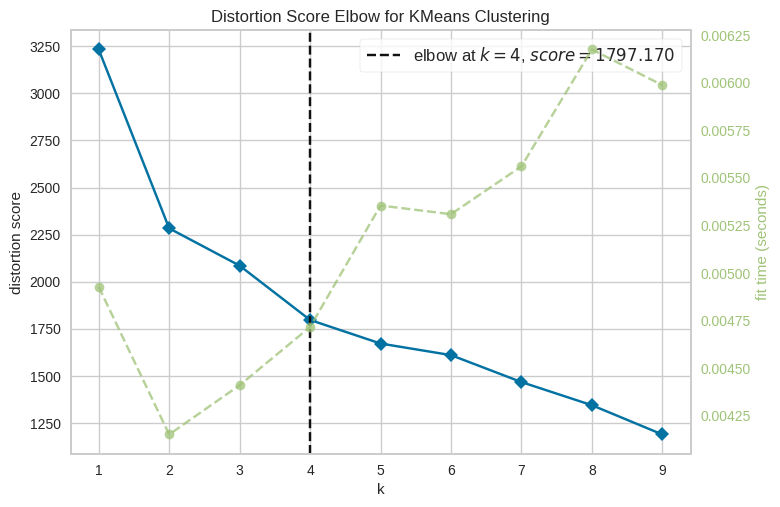

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [98]:
X = df_clean.copy()

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

##### Melatih model K-Means dengan jumlah klaster sebanyak 4, kemudian menganalisis karakteristik masing-masing klaster berdasarkan rata-rata pendapatan tahunan, skor belanja, dan ukuran keluarga.

In [99]:
# Tentukan jumlah cluster
k = 4

# Latih model KMeans
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Ambil label cluster
labels = kmeans.labels_

# Salin dataframe dan tambahkan kolom cluster untuk analisis
X_with_labelsShow = df_clean.copy()
X_with_labelsShow['cluster'] = labels

def analyze_clusters(X, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[X['cluster'] == cluster_id]

        mean_income = cluster_data['Annual Income ($)'].mean()
        mean_spending = cluster_data['Spending Score (1-100)'].mean()
        mean_family = cluster_data['Family Size'].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Income       : {mean_income:.2f}")
        print(f"Rata-rata Spending     : {mean_spending:.2f}")
        print(f"Rata-rata Family Size  : {mean_family:.2f}")

analyze_clusters(X_with_labelsShow, k)


Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Income       : 0.59
Rata-rata Spending     : 0.50
Rata-rata Family Size  : 0.35

Cluster 2:
Rata-rata Income       : 0.58
Rata-rata Spending     : 0.51
Rata-rata Family Size  : 0.35

Cluster 3:
Rata-rata Income       : 0.58
Rata-rata Spending     : 0.54
Rata-rata Family Size  : 0.33

Cluster 4:
Rata-rata Income       : 0.58
Rata-rata Spending     : 0.51
Rata-rata Family Size  : 0.34


##### Visualisasi sementara hasil K-Means menunjukkan bahwa pemisahan klaster belum optimal saat seluruh fitur digunakan. Hal ini kemungkinan disebabkan oleh adanya noise atau variabel yang kurang relevan. Visualisasi dilakukan pada dua fitur utama, yaitu Annual Income dan Spending Score, dengan centroid ditampilkan untuk interpretasi klaster.

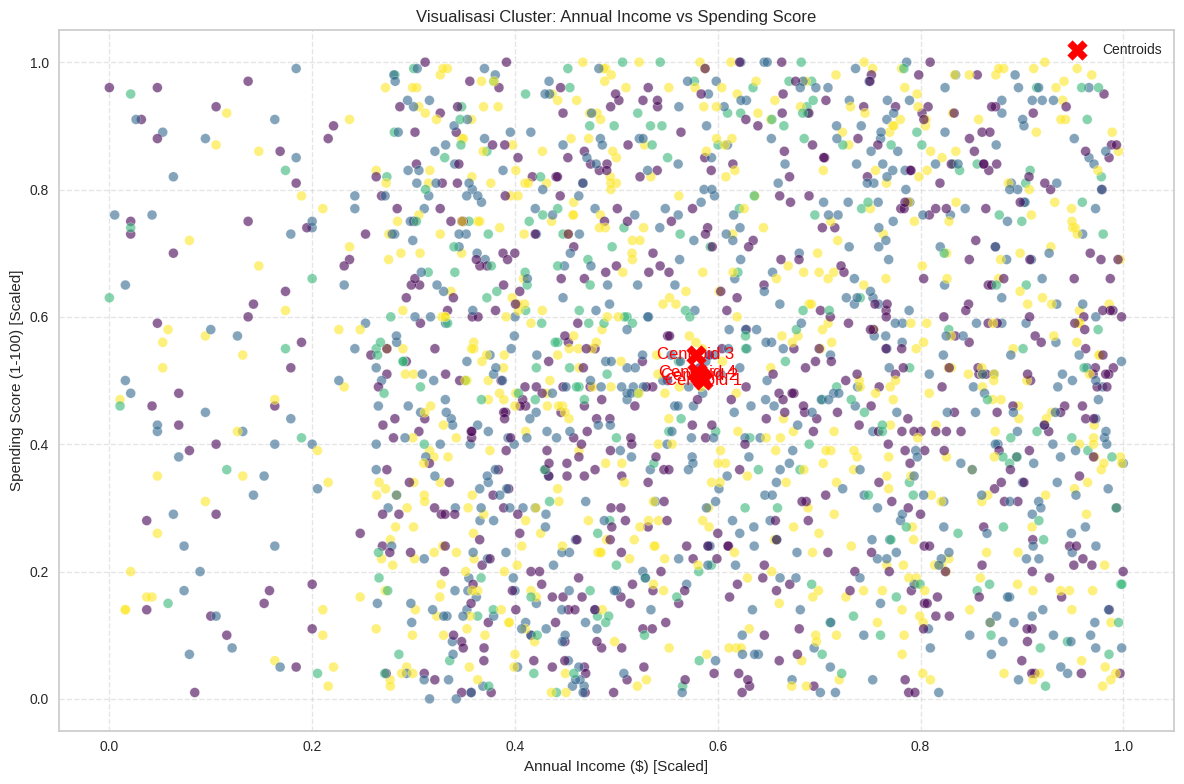

In [100]:
# Ambil posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Scatter plot antara Annual Income dan Spending Score
plt.scatter(
    df_clean['Annual Income ($)'],
    df_clean['Spending Score (1-100)'],
    c=labels,
    cmap='viridis',
    s=50,
    alpha=0.6,
    edgecolors='w',
    marker='o'
)

# Plot centroid untuk dua fitur utama
plt.scatter(
    centroids[:, 1], centroids[:, 2],  # Asumsikan fitur pertama & kedua: Income & Spending
    c='red',
    s=200,
    marker='X',
    label='Centroids'
)

# Tambahkan label centroid
for i, centroid in enumerate(centroids):
    plt.text(
        centroid[1], centroid[2],
        f'Centroid {i+1}',
        color='red',
        fontsize=12,
        ha='center',
        va='center'
    )

# Judul dan label
plt.title('Visualisasi Cluster: Annual Income vs Spending Score')
plt.xlabel('Annual Income ($) [Scaled]')
plt.ylabel('Spending Score (1-100) [Scaled]')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## **b. Evaluasi Model Clustering**

##### Hasil evaluasi menggunakan Silhouette Score menunjukkan nilai yang cukup rendah, yaitu 0.24. Hal ini mengindikasikan bahwa pemisahan antar klaster masih kurang optimal. Oleh karena itu, akan dilakukan pemilihan fitur lanjutan untuk meningkatkan kualitas klasterisasi.

In [101]:
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.19352434612216277


## **c. Feature Selection (PCA)**

##### Silhouette Score setelah dilakukan reduksi dimensi menggunakan PCA (2D) menunjukkan peningkatan signifikan, yaitu sebesar 0.673. Hal ini menunjukkan bahwa penerapan PCA secara substansial memperbaiki kualitas klasterisasi. Dengan hasil ini, proses optimisasi lebih lanjut dapat dilakukan, seperti pencarian jumlah klaster (k) yang lebih tepat, mengingat secara visual data sudah mulai terkelompok dengan baik. Pada tahap selanjutnya, pemilihan jumlah klaster akan dilakukan dengan pendekatan berbasis nilai Silhouette Score, yang dianggap lebih langsung merefleksikan kualitas pemisahan klaster dibanding metode Elbow.

Fitur yang dipilih: ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size', 'Gender_Female', 'Gender_Male', 'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing']

Silhouette Score setelah PCA (2D): 0.6732774802078036


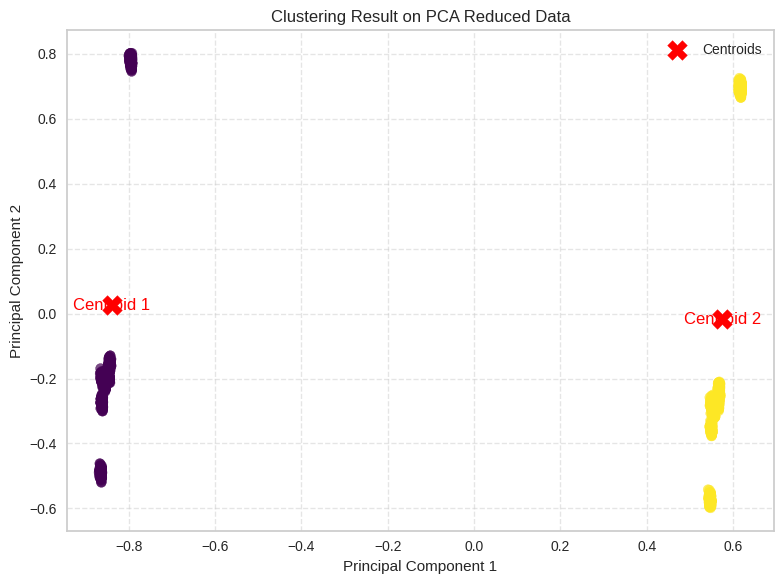

In [102]:
# Feature Selection: hapus fitur dengan varians sangat kecil
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(df_clean)
selected_features = df_clean.columns[selector.get_support()].tolist()
print(f"Fitur yang dipilih: {selected_features}")

# PCA: reduksi ke 2 dimensi untuk clustering & visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Simpan sebagai DataFrame agar lebih mudah divisualisasikan
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Clustering dengan KMeans di ruang PCA
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Evaluasi kualitas cluster
score = silhouette_score(df_pca, labels)
print(f"\nSilhouette Score setelah PCA (2D): {score}")

# Visualisasi cluster hasil KMeans
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')

# Tambahkan label centroid
for i, centroid in enumerate(centroids):
    plt.text(
        centroid[0], centroid[1],
        f'Centroid {i+1}',
        color='red',
        fontsize=12,
        ha='center',
        va='center'
    )

plt.title('Clustering Result on PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### Dilakukan pencarian nilai k terbaik berdasarkan evaluasi Silhouette Score untuk rentang klaster 2 hingga 9. Hasil menunjukkan bahwa k optimal adalah 4, dengan nilai Silhouette Score tertinggi sebesar 0.9125. Nilai ini mengindikasikan pemisahan klaster yang sangat baik dan struktur klaster yang jelas. Visualisasi skor pada setiap nilai k juga menunjukkan tren yang konsisten dalam peningkatan kualitas klaster hingga titik optimal.

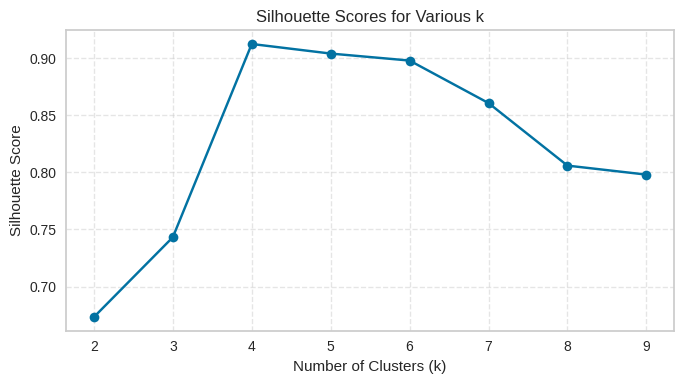

Best k: 4, Silhouette Score: 0.9125


In [103]:
scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_pca)
    labels = kmeans.labels_
    score = silhouette_score(df_pca, labels)
    scores.append(score)

# Plot
plt.figure(figsize=(7, 4))
plt.plot(k_range, scores, marker='o')
plt.title('Silhouette Scores for Various k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print max score info
best_k = k_range[scores.index(max(scores))]
print(f"Best k: {best_k}, Silhouette Score: {max(scores):.4f}")


## **d. Visualisasi Hasil Clustering**

##### Setelah menentukan jumlah klaster optimal (k = 4) menggunakan Silhouette Score, langkah selanjutnya adalah memvisualisasikan hasil clustering. Pada tahap ini, model KMeans dilatih ulang dengan jumlah klaster yang telah ditentukan dan hasilnya divisualisasikan dalam ruang dua dimensi hasil reduksi PCA. Scatter plot memperlihatkan sebaran data berdasarkan dua komponen utama (PC1 dan PC2), dengan warna yang menunjukkan masing-masing klaster. Titik centroid dari setiap klaster ditandai dengan simbol 'X' berwarna merah, lengkap dengan label identifikasinya. Visualisasi ini membantu dalam memahami distribusi dan pemisahan antar klaster yang terbentuk.

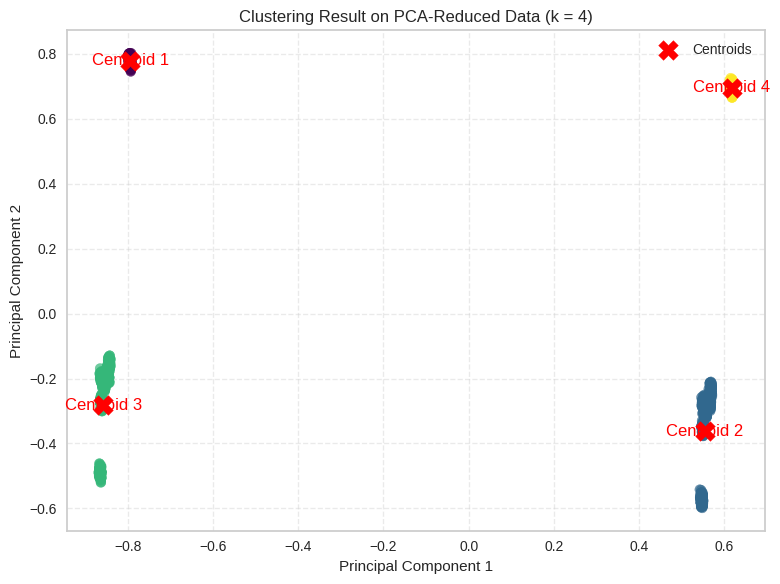

In [104]:
# Clustering ulang dengan k = 4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')

# Tambahkan label centroid
for i, centroid in enumerate(centroids):
    plt.text(
        centroid[0], centroid[1],
        f'Centroid {i+1}',
        color='red',
        fontsize=12,
        ha='center',
        va='center'
    )

plt.title('Clustering Result on PCA-Reduced Data (k = 4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


#### Evaluasi ulang hasil clustering menggunakan Silhouette Score pada data hasil PCA.

In [105]:
score = silhouette_score(df_pca, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.9125041938664938


## **e. Analisis dan Interpretasi Hasil Cluster**

#### Menggabungkan hasil klaster ke data asli tanpa perlu proses decoding atau denormalisasi, lalu menganalisis ringkasan statistik untuk tiap klaster.


In [106]:
# Gabungkan hasil cluster ke data asli
df_clustered = df.copy()
df_clustered['Cluster'] = labels  # dari hasil KMeans sebelumnya

# Analisis ringkasan per klaster
cluster_summary = df_clustered.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income ($)': ['min', 'max', 'mean'],
    'Spending Score (1-100)': ['min', 'max', 'mean'],
    'Family Size': 'mean',
    'Work Experience': 'mean',
    'Gender': lambda x: x.mode()[0],  # modus gender
    'Profession': lambda x: x.mode()[0],  # modus profesi
})

cluster_summary

Age Annual Income ($)                         \
              mean               min     max           mean   
Cluster                                                       
0        48.547414                 0  189709  109880.961207   
1        48.723919              1000  189974  111562.571247   
2        49.012346                 0  189945  111289.261023   
3        49.284211              2000  189446  108102.326316   

        Spending Score (1-100)                 Family Size Work Experience  \
                           min  max       mean        mean            mean   
Cluster                                                                      
0                            1  100  54.017241    3.668103        4.267241   
1                            0  100  50.573791    3.816794        3.964377   
2                            1  100  50.052910    3.786596        4.137566   
3                            1  100  51.860526    3.644737        4.184211   

          Gender  Profession  
        <lambda>    <lambda>  
Cluster                       
0           Male      Artist  
1         Female  Healthcare  
2           Male  Healthcare  
3         Female      Artist

#### Analisis masing-masing klaster dilakukan untuk mengevaluasi karakteristik rata-rata usia, penghasilan, belanja, ukuran keluarga, pengalaman kerja, serta mayoritas gender dan profesi. Tujuannya adalah melihat apakah klaster yang terbentuk relevan dan dapat ditindaklanjuti secara bisnis.

In [107]:
for cluster_id, row in cluster_summary.iterrows():
    print(f"\nCluster {cluster_id + 1}:")
    print(f"- Rata-rata Usia                : {row[('Age', 'mean')]:.2f} tahun")
    print(f"- Rata-rata Penghasilan         : ${row[('Annual Income ($)', 'mean')]:,.0f}")
    print(f"- Rata-rata Skor Pengeluaran    : {row[('Spending Score (1-100)', 'mean')]:.2f}")
    print(f"- Rata-rata Anggota Keluarga    : {row[('Family Size', 'mean')]:.2f} orang")
    print(f"- Rata-rata Pengalaman Kerja    : {row[('Work Experience', 'mean')]:.2f} tahun")
    print(f"- Mayoritas Gender              : {row[('Gender', '<lambda>')]}")
    print(f"- Mayoritas Profesi              : {row[('Profession', '<lambda>')]}")


Cluster 1:
- Rata-rata Usia                : 48.55 tahun
- Rata-rata Penghasilan         : $109,881
- Rata-rata Skor Pengeluaran    : 54.02
- Rata-rata Anggota Keluarga    : 3.67 orang
- Rata-rata Pengalaman Kerja    : 4.27 tahun
- Mayoritas Gender              : Male
- Mayoritas Profesi              : Artist

Cluster 2:
- Rata-rata Usia                : 48.72 tahun
- Rata-rata Penghasilan         : $111,563
- Rata-rata Skor Pengeluaran    : 50.57
- Rata-rata Anggota Keluarga    : 3.82 orang
- Rata-rata Pengalaman Kerja    : 3.96 tahun
- Mayoritas Gender              : Female
- Mayoritas Profesi              : Healthcare

Cluster 3:
- Rata-rata Usia                : 49.01 tahun
- Rata-rata Penghasilan         : $111,289
- Rata-rata Skor Pengeluaran    : 50.05
- Rata-rata Anggota Keluarga    : 3.79 orang
- Rata-rata Pengalaman Kerja    : 4.14 tahun
- Mayoritas Gender              : Male
- Mayoritas Profesi              : Healthcare

Cluster 4:
- Rata-rata Usia                : 49.28 ta

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- Rata-rata Usia                : 48.55 tahun
- Rata-rata Penghasilan         : $109,881
- Rata-rata Skor Pengeluaran    : 54.02
- Rata-rata Anggota Keluarga    : 3.67 orang
- Rata-rata Pengalaman Kerja    : 4.27 tahun
- Mayoritas Gender              : Male
- Mayoritas Profesi              : Artist
- **Analisis:** Kelompok ini berisi pelanggan pria dari profesi kreatif (Artist), dengan penghasilan dan skor belanja yang moderat. Mereka cenderung aktif dalam pengeluaran, meskipun bukan kategori tertinggi. Potensial untuk kampanye promosi seni atau hiburan.

## Cluster 2:
- Rata-rata Usia                : 48.72 tahun
- Rata-rata Penghasilan         : $111,563
- Rata-rata Skor Pengeluaran    : 50.57
- Rata-rata Anggota Keluarga    : 3.82 orang
- Rata-rata Pengalaman Kerja    : 3.96 tahun
- Mayoritas Gender              : Female
- Mayoritas Profesi              : Healthcare
- **Analisis:** Pelanggan wanita di bidang kesehatan. Meskipun berpenghasilan tinggi, mereka cenderung berhati-hati dalam belanja. Cocok untuk penawaran yang berhubungan dengan kebutuhan keluarga atau profesional sibuk.

## Cluster 3:
- Rata-rata Usia                : 49.01 tahun
- Rata-rata Penghasilan         : $111,289
- Rata-rata Skor Pengeluaran    : 50.05
- Rata-rata Anggota Keluarga    : 3.79 orang
- Rata-rata Pengalaman Kerja    : 4.14 tahun
- Mayoritas Gender              : Male
- Mayoritas Profesi              : Healthcare
- **Analisis:** Mirip dengan Cluster 2 namun terdiri dari pelanggan pria. Preferensi belanjanya juga konservatif. Kemungkinan besar memiliki gaya hidup mapan dan stabil. Bisa ditargetkan untuk program loyalitas atau edukasi keuangan.

## Cluster 4:
- Rata-rata Usia                : 49.28 tahun
- Rata-rata Penghasilan         : $108,102
- Rata-rata Skor Pengeluaran    : 51.86
- Rata-rata Anggota Keluarga    : 3.64 orang
- Rata-rata Pengalaman Kerja    : 4.18 tahun
- Mayoritas Gender              : Female
- Mayoritas Profesi              : Artist
- **Analisis:** Pelanggan wanita dari dunia kreatif dengan penghasilan menengah dan pengeluaran relatif aktif. Cocok untuk pendekatan berbasis gaya hidup atau program kreatif (contoh: komunitas, acara seni, dll).

Seluruh cluster berada dalam kisaran usia, penghasilan, dan pengalaman kerja yang relatif serupa, menandakan pasar yang homogen dalam demografi dasar.

Namun, profesi dan gender menjadi pembeda utama yang ditangkap model PCA+KMeans.

Hasil clustering ini logis dan terinterpretasi dengan baik, terutama dalam konteks segmentasi berbasis gaya hidup dan profesi.